In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_pickle("saved_df.pkl")  # clean df

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(707, 9)

<AxesSubplot:>

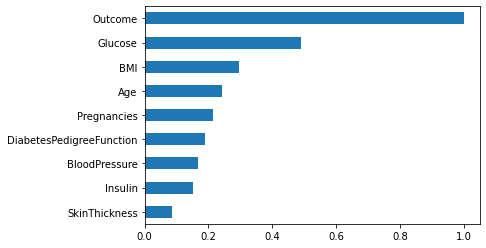

In [7]:
df.corr()["Outcome"].sort_values().plot.barh()  # correlation with Outcome 

In [18]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# Logistik Regression: model fit, predict, confusion matrix
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[121,  16],
       [ 34,  42]], dtype=int64)

Text(0.5, 15.0, 'Predicted Label')

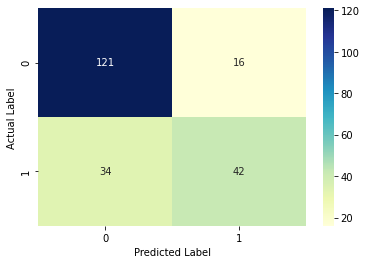

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu", fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       137
           1       0.72      0.55      0.63        76

    accuracy                           0.77       213
   macro avg       0.75      0.72      0.73       213
weighted avg       0.76      0.77      0.76       213



## knn

In [22]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
536,0,105,90,0,0,29.6,0.197,46
74,1,79,75,30,0,32.0,0.396,22
242,3,139,54,0,0,25.6,0.402,22
630,7,114,64,0,0,27.4,0.732,34
537,0,57,60,0,0,21.7,0.735,67


In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
a = pd.DataFrame(X_train, columns=X.columns)

In [27]:
a.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.155097,-0.539264,1.391268,-1.359898,-0.708444,-0.406280,-0.815770,1.107151
1,-0.833984,-1.401818,0.159719,0.564449,-0.708444,-0.060589,-0.233249,-0.932374
2,-0.191758,0.588691,-1.564449,-1.359898,-0.708444,-0.982431,-0.215686,-0.932374
3,1.092694,-0.240688,-0.743417,-1.359898,-0.708444,-0.723163,0.750304,0.087389
4,-1.155097,-2.131671,-1.071830,-1.359898,-0.708444,-1.544179,0.759086,2.891734


In [28]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [29]:
y_pred = knn_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[120,  17],
       [ 37,  39]], dtype=int64)

Text(0.5, 15.0, 'Predicted Label')

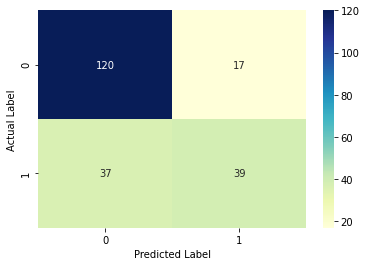

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu", fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       137
           1       0.70      0.51      0.59        76

    accuracy                           0.75       213
   macro avg       0.73      0.69      0.70       213
weighted avg       0.74      0.75      0.74       213



## model tunning  (GridSearchCV)

In [32]:
knn = KNeighborsClassifier()

In [33]:
np.arange(1, 50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [34]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [38]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [43]:
knn_cv_model.best_params_

{'n_neighbors': 15}

In [44]:
knn_tuned = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)

In [45]:
y_pred = knn_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       137
           1       0.70      0.49      0.57        76

    accuracy                           0.74       213
   macro avg       0.73      0.69      0.69       213
weighted avg       0.74      0.74      0.73       213



In [48]:
knn_cv_model = GridSearchCV(knn, knn_params, scoring="recall", cv=10).fit(X_train, y_train)

In [49]:
knn_cv_model.best_params_

{'n_neighbors': 3}

In [50]:
knn_tuned_2 = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
y_pred = knn_tuned_2.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       137
           1       0.65      0.51      0.57        76

    accuracy                           0.73       213
   macro avg       0.70      0.68      0.69       213
weighted avg       0.72      0.73      0.72       213



In [51]:
knn_tuned_3 = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_pred = knn_tuned_3.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       137
           1       0.70      0.51      0.59        76

    accuracy                           0.75       213
   macro avg       0.73      0.69      0.70       213
weighted avg       0.74      0.75      0.74       213



## model deployment

In [57]:
# X und y new defined again and choosing best model: linearregression

In [54]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



## saving the model

In [56]:
import pickle
pickle.dump(log_model, open("my_model", 'wb'))  # our model is saved.

## recall model

In [58]:
model = pickle.load(open("my_model", "rb"))

## predictions with the saved model

In [91]:
prediction = model.predict(X)

In [92]:
prediction[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [93]:
df["Pred"] = prediction

In [94]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


In [95]:
df.sample(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred
621,2,92,76,20,0,24.2,1.698,28,0,1
753,0,181,88,44,510,43.3,0.222,26,1,0
306,10,161,68,23,132,25.5,0.326,47,1,1
622,6,183,94,0,0,40.8,1.461,45,0,1
149,2,90,70,17,0,27.3,0.085,22,0,0
585,1,93,56,11,0,22.5,0.417,22,0,0
316,3,99,80,11,64,19.3,0.284,30,0,0
1,1,85,66,29,0,26.6,0.351,31,0,0
562,1,87,68,34,77,37.6,0.401,24,0,0
282,7,133,88,15,155,32.4,0.262,37,0,0


In [96]:
pred_prob = model.predict_proba(X)

In [97]:
pred_prob[:5]  # links 0, right 1

array([[0.31944933, 0.68055067],
       [0.92255918, 0.07744082],
       [0.11302951, 0.88697049],
       [0.94083141, 0.05916859],
       [0.00643528, 0.99356472]])

In [98]:
pred_prob[:5][:,1]

array([0.68055067, 0.07744082, 0.88697049, 0.05916859, 0.99356472])

In [101]:
df["Prob"] = pred_prob[:][:,1]

In [103]:
df.sample(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred,Prob
284,2,108,80,0,0,27.0,0.259,52,1,0,0.086105
708,9,164,78,0,0,32.8,0.148,45,1,1,0.621646
621,2,92,76,20,0,24.2,1.698,28,0,1,0.726585
551,3,84,68,30,106,31.9,0.591,25,0,0,0.208803
74,1,79,75,30,0,32.0,0.396,22,0,0,0.083930
202,0,108,68,20,0,27.3,0.787,32,0,0,0.273751
735,4,95,60,32,0,35.4,0.284,28,0,0,0.243993
2,8,183,64,0,0,23.3,0.672,32,1,1,0.886970
259,11,155,76,28,150,33.3,1.353,51,1,1,0.969781
666,4,145,82,18,0,32.5,0.235,70,1,0,0.244563


## prediction for a single patient

In [104]:
my_dict={'Pregnancies':10,
        'Glucose':180,
        'BloodPressure':70,
        'SkinThickness':30,
        'Insulin':50,
        'BMI':38,
        'DiabetesPedigreeFunction':0.15,
        'Age':50}

In [105]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [106]:
df_sample=pd.DataFrame([my_dict])

In [107]:
df_sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,10,180,70,30,50,38,0.15,50


In [108]:
single_pred=model.predict(df_sample)

In [109]:
print(single_pred)

[1]


In [110]:
single_pred_prob = model.predict_proba(df_sample)

In [111]:
single_pred_prob[0][1]

0.7949325779336837